In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

## Basic CNN

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

Y variable is:  9


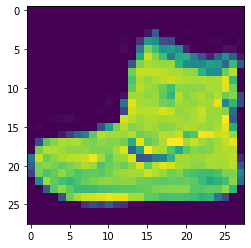

In [5]:
plt.imshow(X_train[0])
print('Y variable is: ',Y_train[0])

In [6]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
def plot_sample(X,Y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

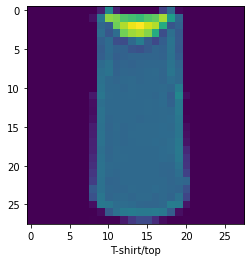

In [9]:
plot_sample(X_train,Y_train,2)

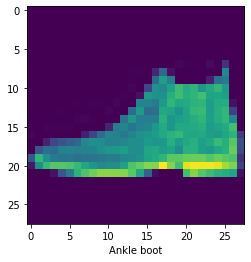

In [10]:
plot_sample(X_test,Y_test,0)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=28,28
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [14]:
input_shape

(28, 28, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D

In [16]:
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 295s 158ms/step - loss: 0.1998 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 296s 158ms/step - loss: 0.1841 - accuracy: 0.9302
Epoch 3/5
1875/1875 [==============================] - 292s 156ms/step - loss: 0.1715 - accuracy: 0.9346
Epoch 4/5
1875/1875 [==============================] - 279s 149ms/step - loss: 0.1608 - accuracy: 0.9393
Epoch 5/5
1875/1875 [==============================] - 279s 149ms/step - loss: 0.1503 - accuracy: 0.9430


In [33]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 12s 37ms/step - loss: 0.2241 - accuracy: 0.9283


[0.22414372861385345, 0.9283000230789185]

### Check the predictions

In [34]:
Y_predict=model.predict(X_test)

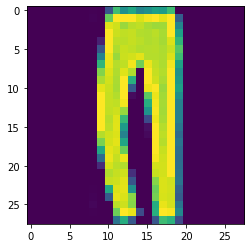

In [35]:
plt.imshow(X_test[2])

In [36]:
# possible probabilities for values from 0 to 9
Y_predict[2]

array([1.0536631e-15, 1.0000000e+00, 8.3147525e-21, 5.6523042e-15,
       1.2250982e-17, 8.6301335e-19, 9.2097561e-17, 1.6524989e-23,
       1.4341820e-17, 1.2218088e-23], dtype=float32)

In [37]:
# To print which number is having max probability from 0 to 9 => our final prediction value
np.argmax(Y_predict[2])

1

In [38]:
print('Actual :',Y_test[2])
print('Predicted :',np.argmax(Y_predict[2]))

Actual : 1
Predicted : 1


In [39]:
Y_test[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [40]:
Y_predict[0:5]

array([[5.2948226e-14, 4.1619266e-18, 9.0693935e-17, 1.4932139e-18,
        6.6711500e-16, 2.9770009e-10, 2.2873731e-15, 1.5007281e-08,
        1.6220646e-15, 1.0000000e+00],
       [1.2489211e-08, 1.4945979e-19, 9.9999988e-01, 1.5078120e-15,
        6.5449655e-08, 1.6152143e-18, 2.3710567e-09, 9.8963305e-22,
        5.7504386e-13, 3.4950999e-22],
       [1.0536631e-15, 1.0000000e+00, 8.3147525e-21, 5.6523042e-15,
        1.2250982e-17, 8.6301335e-19, 9.2097561e-17, 1.6524989e-23,
        1.4341820e-17, 1.2218088e-23],
       [9.3113985e-15, 1.0000000e+00, 1.8140749e-18, 4.9504470e-11,
        9.5567517e-15, 7.5178088e-19, 4.4840511e-14, 1.1576467e-22,
        1.6405385e-17, 1.3600509e-22],
       [2.2070431e-03, 2.6096444e-11, 2.3407378e-04, 3.3818769e-06,
        3.4538400e-04, 7.9893306e-14, 9.9721020e-01, 9.8060731e-18,
        4.8473464e-10, 4.3888948e-14]], dtype=float32)

In [41]:
Y_predict_labels=[np.argmax(i) for i in Y_predict]
Y_predict_labels[0:5]

[9, 2, 1, 1, 6]

In [42]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[883,   2,  19,  15,   2,   1,  76,   0,   2,   0],
       [  0, 988,   0,   7,   1,   0,   2,   0,   2,   0],
       [ 13,   0, 901,   8,  41,   0,  36,   0,   1,   0],
       [  8,   3,  11, 933,  18,   0,  27,   0,   0,   0],
       [  0,   0,  46,  24, 886,   0,  42,   0,   2,   0],
       [  0,   0,   0,   0,   0, 989,   0,   6,   0,   5],
       [ 90,   0,  52,  25,  53,   0, 770,   0,  10,   0],
       [  0,   0,   0,   0,   0,   6,   0, 961,   0,  33],
       [  1,   0,   0,   4,   0,   1,   1,   1, 992,   0],
       [  0,   0,   0,   0,   0,   6,   0,  14,   0, 980]])>

Text(69.0, 0.5, 'Truth')

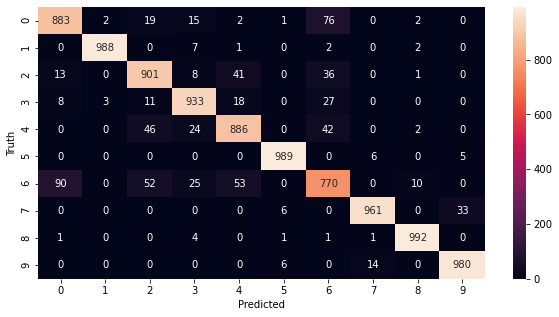

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## LENET

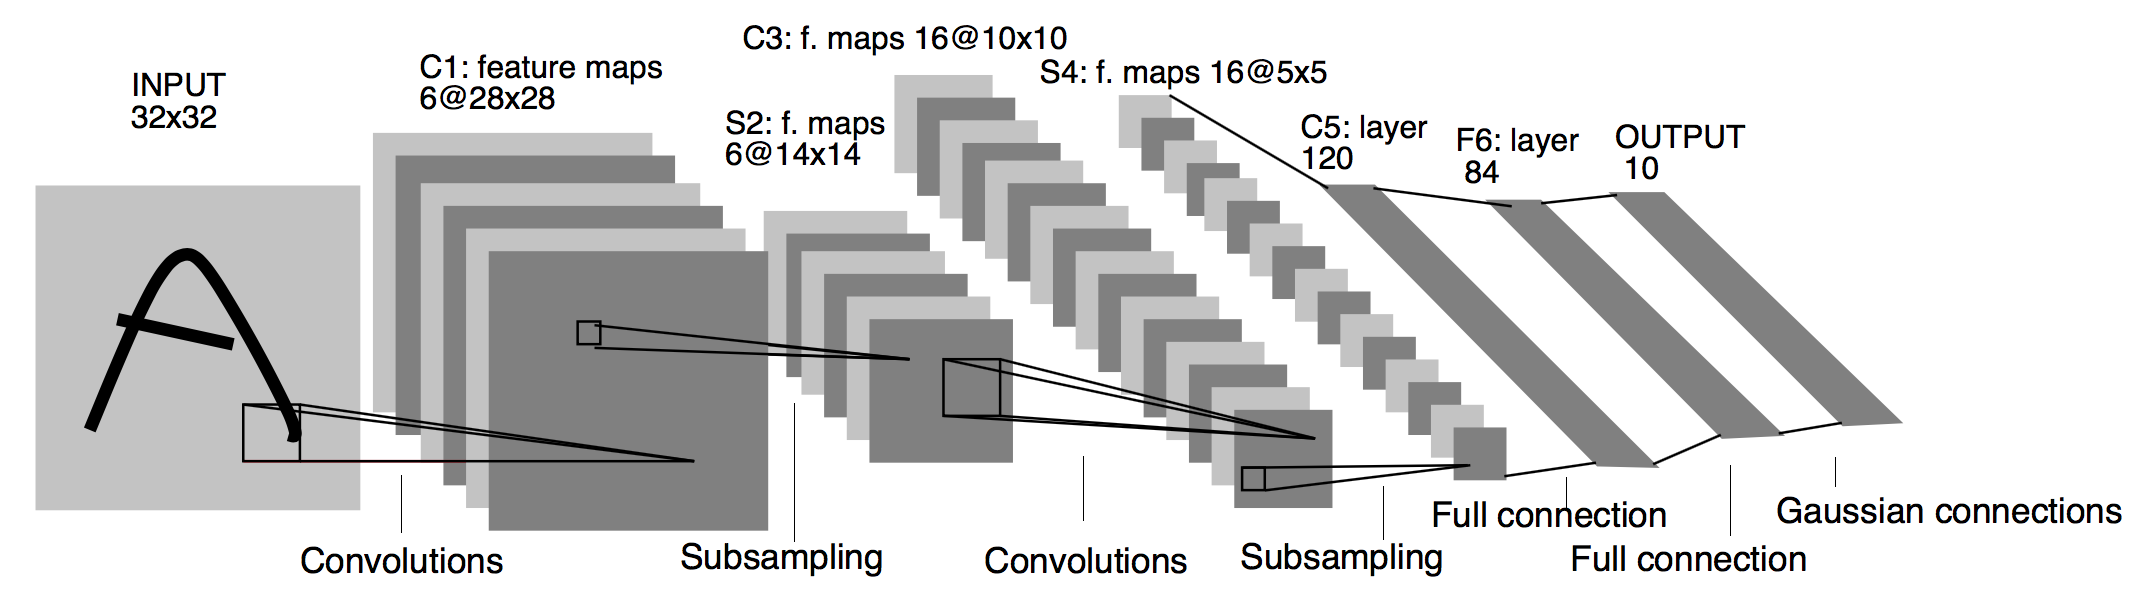

In [76]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [77]:
X_train.shape

(60000, 28, 28)

In [78]:
import cv2
img=cv2.resize(X_train[0],(32,32))
img.shape

(32, 32)

In [79]:
X_train_resize=[]

for i in range(0,len(X_train)):
    img=cv2.resize(X_train[i],(32,32))
    X_train_resize.append(img)

In [80]:
X_test_resize=[]

for i in range(0,len(X_test)):
    img=cv2.resize(X_test[i],(32,32))
    X_test_resize.append(img)

In [81]:
X_train_resize = np.array(X_train_resize)
X_test_resize = np.array(X_test_resize)

In [82]:
print(X_train_resize.shape)
print(X_test_resize.shape)

(60000, 32, 32)
(10000, 32, 32)


In [83]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [84]:
X_train_resize

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [85]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=32,32
if k.image_data_format() == 'channels_first':
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], 1, img_rows, img_cols)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], img_rows, img_cols, 1)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [86]:
input_shape

(32, 32, 1)

In [87]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),name='conv1',activation='relu',input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2, 2),strides=2))
model.add(Conv2D(16, kernel_size=(5, 5),name='conv2',activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=2))
model.add(Flatten())
model.add(Dense(120, name='dense1',activation='relu'))
model.add(Dense(84, name='dense2',activation='relu'))
model.add(Dense(10, activation='softmax'))

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2 (Conv2D)              (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense1 (Dense)              (None, 120)              

In [89]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.fit(X_train_resize,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5343 - accuracy: 0.8200
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3549 - accuracy: 0.8702
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3144 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2909 - accuracy: 0.8923
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2713 - accuracy: 0.8985


In [91]:
model.evaluate(X_test_resize,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3294 - accuracy: 0.8817


[0.329353392124176, 0.8816999793052673]

## ALEXNET

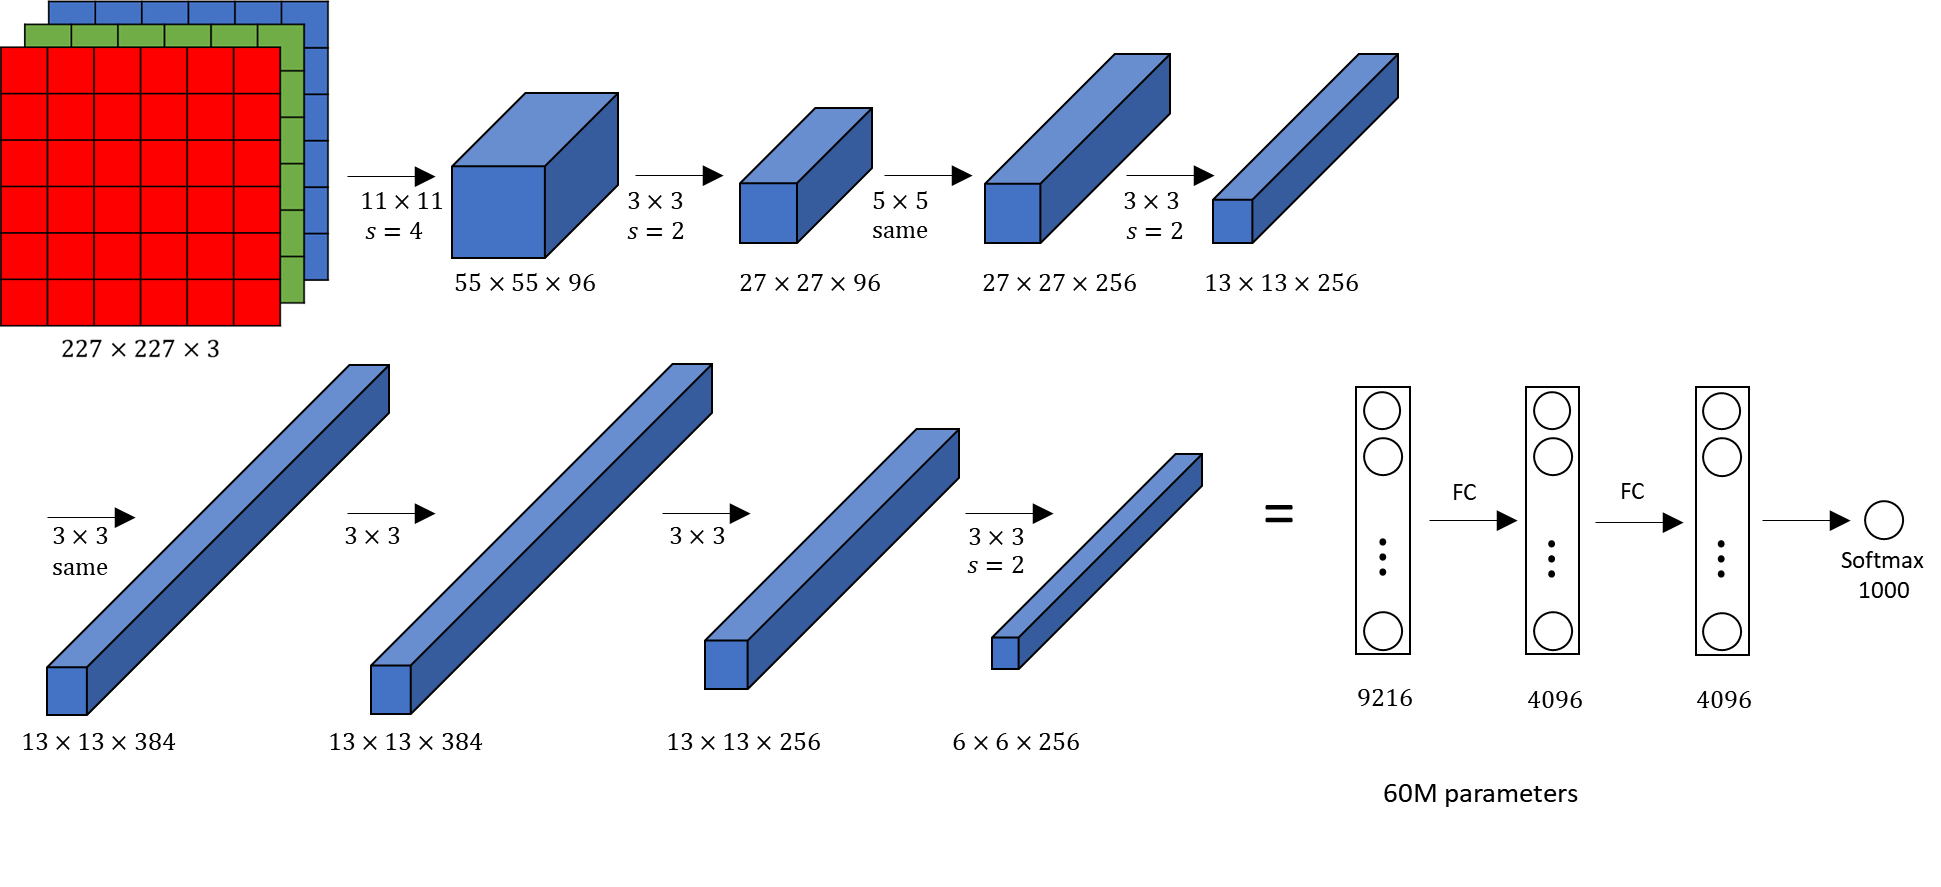

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [13]:
import cv2
img=cv2.resize(X_train[0],(227,227))
img.shape

(227, 227)

In [14]:
X_train_resize=[]

for i in range(0,len(X_train)):
    img=cv2.resize(X_train[i],(227,227))
    X_train_resize.append(img)

In [15]:
X_test_resize=[]

for i in range(0,len(X_test)):
    img=cv2.resize(X_test[i],(227,227))
    X_test_resize.append(img)

In [16]:
X_train_resize = np.array(X_train_resize)
X_test_resize = np.array(X_test_resize)

In [17]:
print(X_train_resize.shape)
print(X_test_resize.shape)

(60000, 227, 227)
(10000, 227, 227)


In [18]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [19]:
X_train_resize

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=227,227
if k.image_data_format() == 'channels_first':
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], 1, img_rows, img_cols)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], img_rows, img_cols, 1)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [21]:
input_shape

(227, 227, 1)

In [24]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11),name='conv1',activation='relu',strides=4,input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Conv2D(256, kernel_size=(5, 5),name='conv2',activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Conv2D(filters=384, kernel_size=(3,3),name="conv3",activation="relu",padding="same"))
model.add(Conv2D(filters=384, kernel_size=(3,3),name="conv4",activation="relu",padding="same")) 
model.add(Conv2D(filters=256, kernel_size=(3,3),name="conv5",activation="relu",padding="same")) 
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Flatten())
model.add(Dense(4096,name="dense1",activation="relu"))
model.add(Dense(4096,name="dense2",activation="relu"))
model.add(Dense(1000,name="dense3",activation="relu")) 
model.add(Dense(10,name="output",activation="softmax")) 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 55, 55, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 13, 13, 384)       885120    
                                                                 
 conv4 (Conv2D)              (None, 13, 13, 384)       1

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(X_train_resize,Y_train,epochs=5)

## Very large size o/p, so very slow. To prevent that add dropout,batch normalization layers.

Epoch 1/5
1875/1875 [==============================] - 179s 90ms/step - loss: 1.2287 - accuracy: 0.7959
Epoch 2/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.3849 - accuracy: 0.8576
Epoch 3/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.4042 - accuracy: 0.8511
Epoch 4/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.3513 - accuracy: 0.8695
Epoch 5/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.3379 - accuracy: 0.8738


In [28]:
model.evaluate(X_test_resize,Y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.3937 - accuracy: 0.8585


[0.39369022846221924, 0.8585000038146973]

## VGGNET

In [45]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [46]:
X_train.shape

(60000, 28, 28)

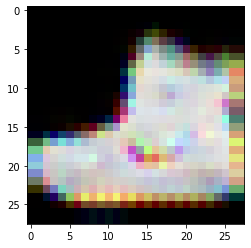

In [47]:
import cv2
rgb_image=cv2.cvtColor(X_train[0],cv2.COLOR_BAYER_BG2RGB)
plt.imshow(rgb_image)
plt.show()

In [48]:
X_train_color=[]

for i in range(0,len(X_train)):
    rgb_img=cv2.cvtColor(X_train[i],cv2.COLOR_BAYER_BG2RGB)
    X_train_color.append(rgb_img)

In [49]:
X_test_color=[]

for i in range(0,len(X_test)):
    rgb_img=cv2.cvtColor(X_test[i],cv2.COLOR_BAYER_BG2RGB)
    X_test_color.append(rgb_img)

In [50]:
X_train_color = np.array(X_train_color)
X_test_color = np.array(X_test_color)

In [51]:
print(X_train_color.shape)
print(X_test_color.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [52]:
import cv2
img=cv2.resize(X_train[0],(224,224))
img.shape

(224, 224)

In [53]:
X_train_resize=[]

for i in range(0,len(X_train)):
    img=cv2.resize(X_train[i],(224,224))
    X_train_resize.append(img)

In [54]:
X_test_resize=[]

for i in range(0,len(X_test)):
    img=cv2.resize(X_test[i],(224,224))
    X_test_resize.append(img)

In [55]:
X_train_resize = np.array(X_train_resize)
X_test_resize = np.array(X_test_resize)

In [56]:
X_train_resize.shape

(60000, 224, 224)

In [57]:
X_test_resize.shape

(10000, 224, 224)

In [59]:
# X_train_resize=X_train_resize.reshape(3,X_train_resize.shape[0],X_train_resize.shape[1],X_train_resize.shape[2])
# X_train_resize.shape

In [12]:
# X_test_resize=X_test_resize.reshape(1,X_test_resize.shape[0],X_test_resize.shape[1],X_test_resize.shape[2])
# X_test_resize.shape

(1, 10000, 224, 224)

In [60]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=224,224
if k.image_data_format() == 'channels_first':
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], 3, img_rows, img_cols)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], img_rows, img_cols, 1)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 3)

In [61]:
input_shape

(224, 224, 3)

In [62]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [63]:
X_train_resize

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [64]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from keras.models import Model

In [65]:
vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
#VGG16 is going to takecare of all the architecture
#include_top - remove the 1st and the last layer
#Imagenet weights is what we need for optimization

In [66]:
for layer in vgg16.layers:
    layer.trainable=False
#We dont want to train the fron 13 layers and we need ttrin only rhr last 2 layers

In [67]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [68]:
model = keras.Sequential([vgg16,
                          keras.layers.Flatten(),
                          keras.layers.Dense(units = 256,activation = 'relu'),
                          keras.layers.Dense(units = 256,activation='relu'),
                          keras.layers.Dense(units = 10,activation ='softmax')])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 21,205,834
Trainable params: 6,491,146
Non-trainable params: 14,714,688
_________________________________________________________________


In [70]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
model.fit(X_train_resize,Y_train,epochs=5)

Epoch 1/5


ValueError: in user code:

    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (32, 224, 224, 1)


In [ ]:
model.evaluate(X_test,Y_test)

## Inception 

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
import cv2
img=cv2.resize(X_train[0],(299,299))
img.shape

(299, 299)

In [6]:
X_train_resize=[]

for i in range(0,len(X_train)):
    img=cv2.resize(X_train[i],(299,299))
    X_train_resize.append(img)

In [7]:
X_test_resize=[]

for i in range(0,len(X_test)):
    img=cv2.resize(X_test[i],(299,299))
    X_test_resize.append(img)

In [8]:
X_train_resize = np.array(X_train_resize)
X_test_resize = np.array(X_test_resize)

In [9]:
X_train_resize.shape

(60000, 299, 299)

In [10]:
X_test_resize.shape

(10000, 299, 299)

In [11]:
X_train_resize=X_train_resize.reshape(1,X_train_resize.shape[0],X_train_resize.shape[1],X_train_resize.shape[2])
X_train_resize.shape

(1, 60000, 299, 299)

In [12]:
X_test_resize=X_test_resize.reshape(1,X_test_resize.shape[0],X_test_resize.shape[1],X_test_resize.shape[2])
X_test_resize.shape

(1, 10000, 299, 299)

In [13]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
X_train_resize

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
    

In [15]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [16]:
inception = InceptionV3(weights='imagenet', include_top=False,input_shape=(299,299,3))

In [17]:
for layer in inception.layers:
    layer.trainable=False

In [18]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [20]:
tf.keras.utils.plot_model(inception, "inception_.png", show_shapes=True)

In [21]:
model = keras.Sequential([inception,
                          keras.layers.Flatten(),
                          keras.layers.Dense(units = 256,activation = 'relu'),
                          keras.layers.Dense(units = 256,activation='relu'),
                          keras.layers.Dense(units = 10,activation ='softmax')])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 256)               33554688  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 55,425,834
Trainable params: 33,623,050
Non-trainable params: 21,802,784
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train_resize,Y_train,epochs=5)

ValueError: ignored

In [25]:
model.evaluate(X_test,Y_test)

ValueError: ignored

# RES NET

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import cv2
img=cv2.resize(X_train[0],(224,224))
img.shape

(224, 224)

In [5]:
X_train_resize=[]

for i in range(0,len(X_train)):
    img=cv2.resize(X_train[i],(224,224))
    X_train_resize.append(img)

In [6]:
X_test_resize=[]

for i in range(0,len(X_test)):
    img=cv2.resize(X_test[i],(224,224))
    X_test_resize.append(img)

In [7]:
X_train_resize = np.array(X_train_resize)
X_test_resize = np.array(X_test_resize)

In [8]:
X_train_resize.shape

(60000, 224, 224)

In [9]:
X_test_resize.shape

(10000, 224, 224)

In [10]:
X_train_resize=X_train_resize.reshape(1,X_train_resize.shape[0],X_train_resize.shape[1],X_train_resize.shape[2])
X_train_resize.shape

(1, 60000, 224, 224)

In [11]:
X_test_resize=X_test_resize.reshape(1,X_test_resize.shape[0],X_test_resize.shape[1],X_test_resize.shape[2])
X_test_resize.shape

(1, 10000, 224, 224)

In [12]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
X_train_resize

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
    

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [15]:
resnet = ResNet50(weights='imagenet',include_top=True,input_shape=(224,224,3))

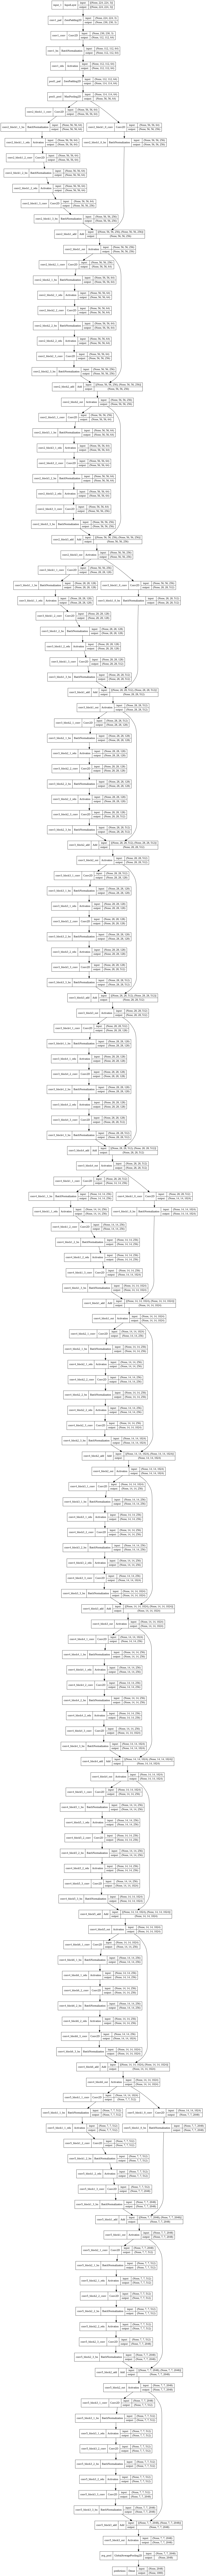

In [16]:
tf.keras.utils.plot_model(resnet, "renet50.png", show_shapes=True)

In [17]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [18]:
for layer in resnet.layers:
    layer.trainable=False

In [19]:
model = keras.Sequential([resnet,
                          keras.layers.Flatten(),
                          keras.layers.Dense(units = 256,activation = 'relu'),
                          keras.layers.Dense(units = 256,activation='relu'),
                          keras.layers.Dense(units = 10,activation ='softmax')])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 256)               256256    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 25,961,330
Trainable params: 324,618
Non-trainable params: 25,636,712
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train_resize,Y_train,epochs=5)

ValueError: ignored

In [23]:
model.evaluate(X_test,Y_test)

ValueError: ignored